    participant  cluster  place  speed_kmh  split_stroke_rate
0          Eric        2   16.5  15.075377                 28
1          Eric        2   22.5  14.851485                 26
2          Eric        2   22.5  14.851485                 27
3          Eric        2    7.0  15.584416                 29
4       Edouard        2    4.5  15.679443                 31
..          ...      ...    ...        ...                ...
123       Julie        2   59.5  13.740458                 33
124       Hervé        2   39.5  14.150943                 26
125       Hervé        2   69.5  13.493253                 25
126       Hervé        2   78.0  13.186813                 27
127       Hervé        2   66.0  13.554217                 31

[128 rows x 5 columns]


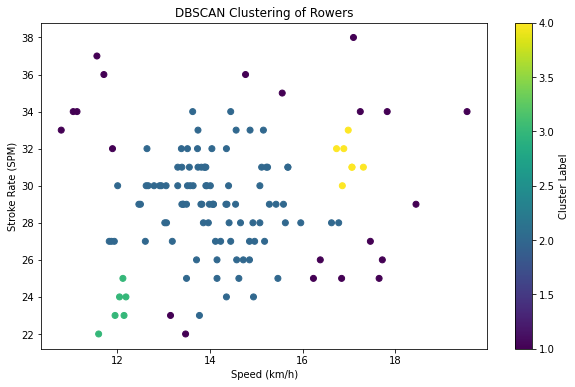

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the data
df = pd.read_json("Test/ergometer_500m.json")

# Define target variable (e.g., speed) and features (time)
X = df['split_calories'].values.reshape(-1, 1)  # Time as the independent variable

# Calcul de la vitesse en km/h (distance en km / temps en heures)
df['split_time_hours'] = df['split_time'] / 3600  # Conversion du temps en heures
df['speed_kmh'] = (0.5 / df['split_time_hours'])  # La distance est de 0.5 km (500m)
df['speed_category'] = pd.cut(df['speed_kmh'], bins=[0, 13.5, 15, 20], labels=[0, 1, 2])

y = df['speed_category']

# Assuming these columns are relevant for clustering
features = df[['speed_kmh', 'split_stroke_rate']]  # Choose appropriate features

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
df['cluster'] = dbscan.fit_predict(scaled_features)
df['cluster'] = [df['cluster'][i]+2 for i in range(len(df))]

# Calculate the average speed and stroke rate per cluster
cluster_means = df.groupby('cluster')[['speed_kmh', 'split_stroke_rate']].mean().reset_index()

# Assign rankings within each cluster
df['place'] = df.groupby('cluster')['speed_kmh'].rank(ascending=False)

# Display the final DataFrame with clusters and places
print(df[['participant', 'cluster', 'place', 'speed_kmh', 'split_stroke_rate']])

# Optional: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(df['speed_kmh'], df['split_stroke_rate'], c=df['cluster'], cmap='viridis', label='Clusters')
plt.title('DBSCAN Clustering of Rowers')
plt.xlabel('Speed (km/h)')
plt.ylabel('Stroke Rate (SPM)')
plt.colorbar(label='Cluster Label')
plt.show()